In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="../css/custom.css">

# Build your first convolutional neural network with Keras

![keras center third](../images/keras_basics/keras.png)
![footer_logo](../images/logo.png)

## Goal
The goal of this notebook is to let you build your first convolutional neural network. The example we will be working with is digit classification. Use layers such as convolutions, pooling, dropout and batch normalization for image recognition. 

## Program

- [The MNIST Dataset]()
- [Data Preprocessing]()
- [Building the model]()
- [Training and evaluating the model]()

In [2]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

np.random.seed(707)

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 15, 6

---
## MNIST 

Like many other libraries, such as scikit-learn, `keras` includes some standard datasets to play around with. Let's load the MNIST dataset and explore what it contains: 

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


Later, when you have read this Notebook and made sense of the model, try loading the CIFAR10 dataset:

In [5]:
# (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

Some summary statistics on data size, type and range:

In [6]:
print(
    f"Train:\tX shape:{X_train.shape}\tY shape:{y_train.shape}\tType (X, y): ({X_train.dtype}, {y_train.dtype})\tX values (max, min): ({X_train.min()}, {X_train.max()})"
)
print(
    f"Test:\tX shape:{X_test.shape}\tY shape:{y_test.shape}\tType (X, y): ({X_test.dtype}, {y_test.dtype})\tX values (max, min): ({X_test.min()}, {X_test.max()})"
)

Train:	X shape:(60000, 28, 28)	Y shape:(60000,)	Type (X, y): (uint8, uint8)	X values (max, min): (0, 255)
Test:	X shape:(10000, 28, 28)	Y shape:(10000,)	Type (X, y): (uint8, uint8)	X values (max, min): (0, 255)


Show some example images:

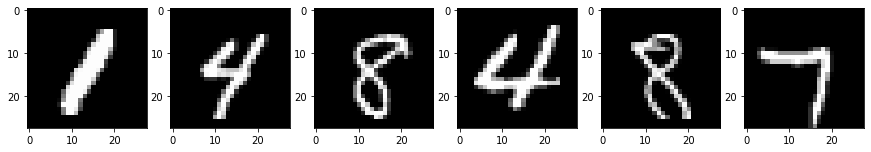

In [7]:
[ax.imshow(random.choice(X_train), cmap="gray") for ax in plt.subplots(1, 6)[1]] 

### <mark>Exercise: Dataset summary
>
> - How many training examples do we have?
> - How many color channels does each picture have?
> - What will the input size to the Deep Neural Network (DNN) be?
> - What will the output size of the DNN be? 

## Data Preprocessing

We have to do some preprocessing on our data:

- Rescale pixel values between 0 and 1
- Input type should be float
- There are 10 classes so in order to compute the cross entropy loss function we need to one-hot encoded vectors.

In [8]:
if len(X_train.shape) != 4:
    X_train = np.expand_dims(X_train, axis=3)
if len(X_test.shape) != 4:
    X_test = np.expand_dims(X_test, axis=3)

X_train, X_test = X_train.astype("float") / 255, X_test.astype("float") / 255
y_train_onehot, y_test_onehot = to_categorical(y_train), to_categorical(y_test)


Check the resulting dimensions and types:

In [9]:
print(
    f"Train:\tX shape:{X_train.shape}\tY shape:{y_train_onehot.shape}\tType (X, y): ({X_train.dtype}, {y_train_onehot.dtype})\tX values (min, max): ({X_train.min()}, {X_train.max()})"
)
print(
    f"Test:\tX shape:{X_test.shape}\tY shape:{y_test_onehot.shape}\tType (X, y): ({X_test.dtype}, {y_test_onehot.dtype})\tX values (min, max): ({X_test.min()}, {X_test.max()})"
)

Train:	X shape:(60000, 28, 28, 1)	Y shape:(60000, 10)	Type (X, y): (float64, float32)	X values (min, max): (0.0, 1.0)
Test:	X shape:(10000, 28, 28, 1)	Y shape:(10000, 10)	Type (X, y): (float64, float32)	X values (min, max): (0.0, 1.0)


In [10]:
y_test[0]

7

In [11]:
y_test_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### <mark>Exercise: Model input & output
> - Are the input and output sizes correct from what you thought?
> - What does the fourth dimension of X represent?

---
## Model

Now that we have our data prepared, we can start building a model.
We will use some new layers for our model.

### <mark> Exercise: Model construction

Construct a model with the instructions:
 
> - inputs are normalized using `BatchNormalization` followed by a `Dropout` layer with a rate of 0.3
>   - specify the right input_shape for `BatchNormalization`
> - then add a [2D convolutional layer](https://keras.io/layers/convolutional/) with a kernel of 3x3
>   - also use `'same'` as `padding`, `32` `filters`, and `relu` as `activation`
> - output from the convolutional layer goes through a [`MaxPooling` layer](https://keras.io/layers/pooling/)
> - then `Flatten` the output and add a `Dropout` layer with a rate of 0.3
> - connect the output to a `Dense` layer with the right amount of `units` for our classification problem
> - followed by a `BatchNormalization` and `relu` activation function
> - then a `DropoutLayer`
> - and finally connect to the output layer with an `softmax` activation function

Don't forget to:
> - use the `relu` activation function or others
> - use `Dropout` layers

In [ ]:
# NBVAL_RAISES_EXCEPTION
def make_cnn_model():
    model = Sequential()
    # input layer transformation (BatchNormalization + Dropout)

    # convolutional layer (Conv2D + MaxPooling2D + Flatten + Dropout)

    # fully connected layer (Dense + BatchNormalization + Activation + Dropout)

    # output layer (Dense + BatchNormalization + Activation)

    return model


model = make_cnn_model()
model.summary()

In [15]:
# %load ../answers/keras_basics_cnn.py
from tensorflow.keras import layers


def make_cnn_model():
    model = Sequential()
    
    # input layer transformation (BatchNormalization + Dropout)
    model.add(layers.BatchNormalization(input_shape=(28, 28, 1)))  # difference between rescale earlier?
    model.add(layers.Dropout(rate=0.3))

    # convolutional layer (Conv2D + MaxPooling2D + Flatten + Dropout)
    # learns 32 filters with 3x3 + 1 bias parameters.
    model.add(
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same")
    ) # why relu?
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten()) # add extra channel dimension?
    model.add(layers.Dropout(rate=0.3))

    # fully connected layer (Dense + BatchNormalization + Activation + Dropout)
    model.add(layers.Dense(150))
    model.add(layers.BatchNormalization()) # why here?
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(rate=0.3))

    # output layer (Dense + BatchNormalization + Activation)
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("softmax"))

    return model


model = make_cnn_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout_1 (Dropout)         (None, 6272)              0

### <mark>Question:
> can you explain where are the number of parameters for each layer coming from?

## Training and evaluating the model

Train the model and make sure your accuracy reaches 88%:

In [16]:
model = make_cnn_model()
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(
    X_train,
    y_train_onehot,
    batch_size=5000,
    epochs=4,
    validation_split=0.2,
    verbose=1
)

Epoch 1/4
10/10 [==============================] - 13s 1s/step - loss: 1.2540 - accuracy: 0.6853 - val_loss: 1.5394 - val_accuracy: 0.7492
Epoch 2/4
10/10 [==============================] - 12s 1s/step - loss: 0.8102 - accuracy: 0.8658 - val_loss: 1.4277 - val_accuracy: 0.8836
Epoch 3/4
10/10 [==============================] - 12s 1s/step - loss: 0.7299 - accuracy: 0.8867 - val_loss: 1.4088 - val_accuracy: 0.9212
Epoch 4/4
10/10 [==============================] - 13s 1s/step - loss: 0.6795 - accuracy: 0.9011 - val_loss: 1.4239 - val_accuracy: 0.8976


In [17]:
score = model.evaluate(X_test, y_test_onehot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.4331119060516357
Test accuracy: 0.8984000086784363


In [18]:
y_hat_onehot = model.predict(X_test)
y_hat = np.argmax(y_hat_onehot, axis=1).astype(np.int16)
y_hat

array([7, 2, 1, ..., 4, 5, 6], dtype=int16)

In [19]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

labels=[0,1,2,3,4,5,6,7,8,9]


confusion_df = pd.DataFrame(confusion_matrix(y_test, y_hat, labels=labels), 
                            columns=["Prediction " + str(label) for label in labels], 
                            index=["True " + str(label) for label in labels])
confusion_df

,Prediction 0,Prediction 1,Prediction 2,Prediction 3,Prediction 4,Prediction 5,Prediction 6,Prediction 7,Prediction 8,Prediction 9
True 0,964,3,0,0,0,5,4,2,2,0
True 1,0,1132,3,0,0,0,0,0,0,0
True 2,9,68,909,6,11,0,2,21,5,1
True 3,7,59,25,850,2,28,1,27,7,4
True 4,0,24,4,0,930,0,3,1,0,20
True 5,8,24,2,8,6,829,6,5,1,3
True 6,13,36,6,0,14,26,861,2,0,0
True 7,1,59,9,0,16,0,0,923,0,20
True 8,16,134,27,10,29,34,4,17,686,17
True 9,7,28,5,7,31,8,0,22,1,900


In [ ]:
print(multilabel_confusion_matrix(y_test, y_hat, labels=labels))

### <mark>Questions: layers

> - You've used layers like the convolutional and max-pooling layers. Can you explain what every layer does?
> - What is the difference betwen max-pooling and average-pooling?
> - What does batch normalization do? Why should it happen before the activation function?
> - What is a drop out layer?

---
## Summary

In this exercise, we've used a convolution neural network to classify images.
Layers like `Conv2D`, `MaxPooling2D` and `Flatten` are the building blocks for any networks working on images.